In [1]:
from google.colab import drive

# The following command will prompt a URL for you to click and obtain the
# authorization code

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import ranksums
from scipy import stats
import seaborn as sns
import numpy as np


DATA = Path("/content/drive/My Drive/ECBME4060/Project/Genomics Project/Fig 2")

In [3]:
df_taq = pd.read_csv(DATA /"taqman_d4.tsv",delimiter="\t")
df_IF = pd.read_csv(DATA /"immunofluorescence.tsv",delimiter="\t")
df_hist = pd.read_csv(DATA /"histopath.tsv",delimiter="\t")

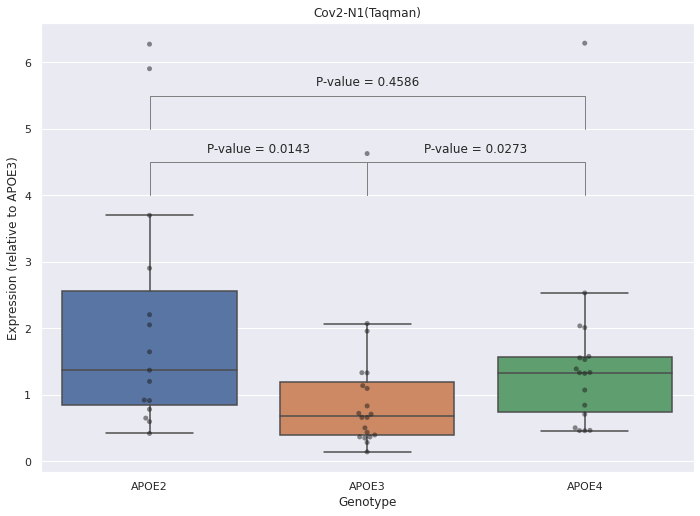

In [4]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.boxplot(x="genotype", y="ct_norm", data=df_taq, fliersize=0)
ax = sns.swarmplot(x="genotype", y="ct_norm", data=df_taq, color="k",alpha=0.5, ax=ax)
ax.set(title = "Cov2-N1(Taqman)",xlabel="Genotype",ylabel='Expression (relative to APOE3)')

stat,pval_23 = stats.mannwhitneyu(df_taq[df_taq.genotype=="APOE2"].ct_norm,df_taq[df_taq.genotype=="APOE3"].ct_norm,alternative="two-sided")

stat,pval_43 = stats.mannwhitneyu(df_taq[df_taq.genotype=="APOE4"].ct_norm,df_taq[df_taq.genotype=="APOE3"].ct_norm,alternative="two-sided")

stat,pval_24 = stats.mannwhitneyu(df_taq[df_taq.genotype=="APOE2"].ct_norm,df_taq[df_taq.genotype=="APOE4"].ct_norm,alternative="two-sided")

ax.plot([0,0,1,1],[4,4.5,4.5,4], lw=1,color="grey")
ax.text(0.5,4.7, "P-value = {}".format(np.round(pval_23, 4)), ha="center", va="center")

ax.plot([1,1,2,2],[4,4.5,4.5,4], lw=1,color="grey")
ax.text(1.5, 4.7, "P-value = {}".format(np.round(pval_43, 4)), ha="center", va="center")

ax.plot([0,0,2,2],[5,5.5,5.5,5], lw=1,color="grey")
ax.text(1, 5.7, "P-value = {}".format(np.round(pval_24, 4)), ha="center", va="center")
plt.savefig(DATA/ "2a.png")


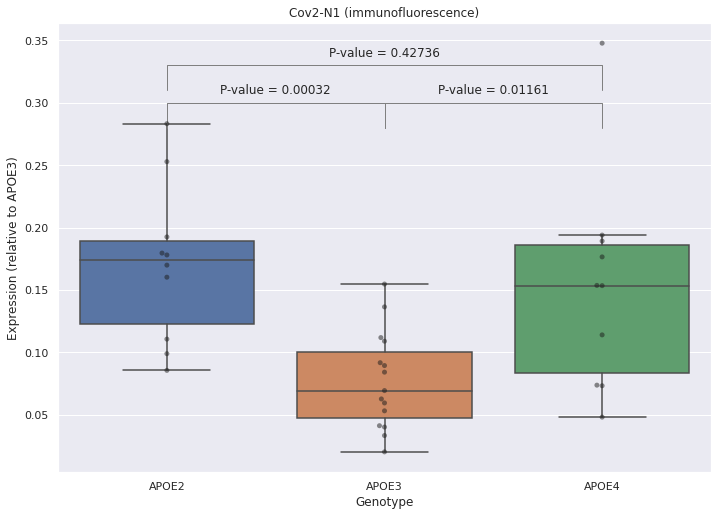

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

stat,pval_23 = stats.mannwhitneyu(df_IF[df_IF.genotype=="APOE2"].area_N1,df_IF[df_IF.genotype=="APOE3"].area_N1,alternative="greater")

stat,pval_43 = stats.mannwhitneyu(df_IF[df_IF.genotype=="APOE4"].area_N1,df_IF[df_IF.genotype=="APOE3"].area_N1,alternative="two-sided")

stat,pval_24 = stats.mannwhitneyu(df_IF[df_IF.genotype=="APOE2"].area_N1,df_IF[df_IF.genotype=="APOE4"].area_N1,alternative="two-sided")

ax = sns.boxplot(x="genotype", y="area_N1", data=df_IF, fliersize=0)
ax = sns.swarmplot(x="genotype", y="area_N1", data=df_IF, color="k",alpha=0.5, ax=ax)
ax.set(ylabel='Positive area(%)')
ax.set(title = "Cov2-N1 (immunofluorescence)",xlabel="Genotype",ylabel='Expression (relative to APOE3)')

ax.plot([0,0,1,1],[0.28,0.3,0.3,0.28], lw=1,color="grey")
ax.text(0.5,0.31, "P-value = {}".format(np.round(pval_23, 5)), ha="center", va="center")

ax.plot([1,1,2,2],[0.28,0.3,0.3,0.28], lw=1,color="grey")
ax.text(1.5,0.31, "P-value = {}".format(np.round(pval_43, 5)), ha="center", va="center")

ax.plot([0,0,2,2],[0.31,0.33,0.33,0.31], lw=1,color="grey")
ax.text(1, .34, "P-value = {}".format(np.round(pval_24, 5)), ha="center", va="center")
plt.savefig(DATA/ "2b.png")

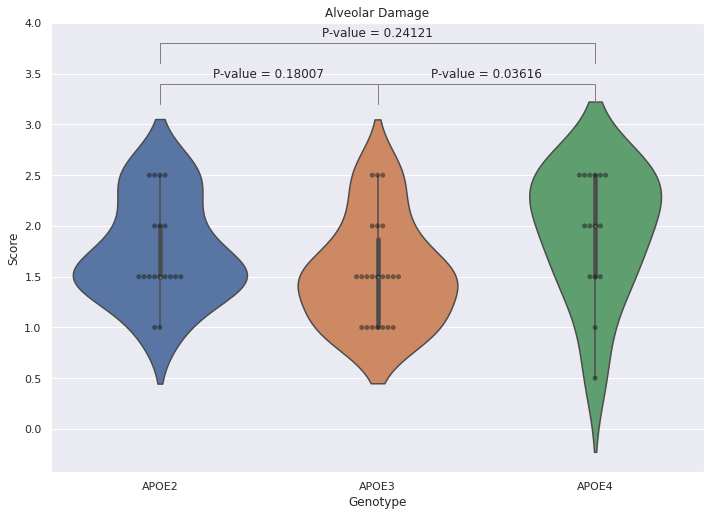

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

stat,pval_23 = stats.mannwhitneyu(df_hist[df_hist.genotype=="APOE2"].alveolar_damage,df_hist[df_hist.genotype=="APOE3"].alveolar_damage,alternative="two-sided")

stat,pval_43 = stats.mannwhitneyu(df_hist[df_hist.genotype=="APOE4"].alveolar_damage,df_hist[df_hist.genotype=="APOE3"].alveolar_damage,alternative="two-sided")

stat,pval_24 = stats.mannwhitneyu(df_hist[df_hist.genotype=="APOE2"].alveolar_damage,df_hist[df_hist.genotype=="APOE4"].alveolar_damage,alternative="two-sided")

ax = sns.violinplot(x="genotype", y="alveolar_damage", data=df_hist, fliersize=0)
ax = sns.swarmplot(x="genotype", y="alveolar_damage", data=df_hist, color="k",alpha=0.5, ax=ax)
ax.set(title="Alveolar Damage",xlabel="Genotype",ylabel="Score")

ax.plot([0,0,1,1],[3.2,3.4,3.4,3.2], lw=1,color="grey")
ax.text(0.5,3.5, "P-value = {}".format(np.round(pval_23, 5)), ha="center", va="center")

ax.plot([1,1,2,2],[3.2,3.4,3.4,3.2], lw=1,color="grey")
ax.text(1.5, 3.5, "P-value = {}".format(np.round(pval_43, 5)), ha="center", va="center")

ax.plot([0,0,2,2],[3.6,3.8,3.8,3.6], lw=1,color="grey")
ax.text(1, 3.9, "P-value = {}".format(np.round(pval_24, 5)), ha="center", va="center")
plt.savefig(DATA/ "Alveolar.png")

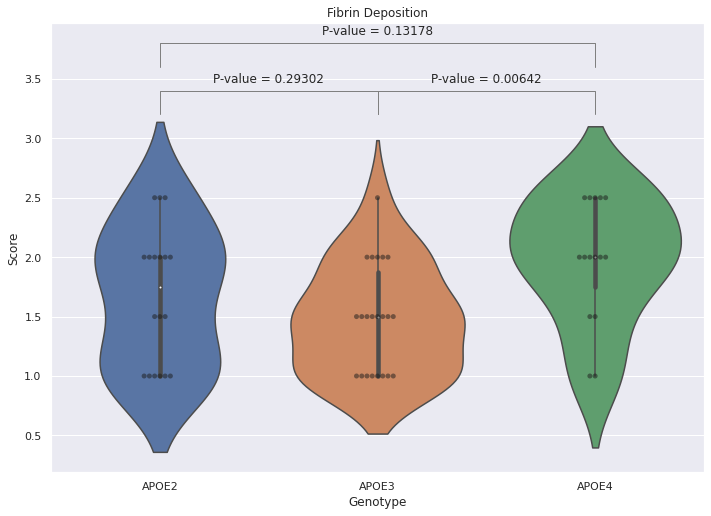

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

stat,pval_23 = stats.mannwhitneyu(df_hist[df_hist.genotype=="APOE2"].fibrin,df_hist[df_hist.genotype=="APOE3"].fibrin,alternative="two-sided")

stat,pval_43 = stats.mannwhitneyu(df_hist[df_hist.genotype=="APOE4"].fibrin,df_hist[df_hist.genotype=="APOE3"].fibrin,alternative="two-sided")

stat,pval_24 = stats.mannwhitneyu(df_hist[df_hist.genotype=="APOE2"].fibrin,df_hist[df_hist.genotype=="APOE4"].fibrin,alternative="two-sided")

ax = sns.violinplot(x="genotype", y="fibrin", data=df_hist, fliersize=0)
ax = sns.swarmplot(x="genotype", y="fibrin", data=df_hist, color="k",alpha=0.5, ax=ax)
ax.set(title="Fibrin Deposition",xlabel="Genotype",ylabel="Score")

ax.plot([0,0,1,1],[3.2,3.4,3.4,3.2], lw=1,color="grey")
ax.text(0.5,3.5, "P-value = {}".format(np.round(pval_23, 5)), ha="center", va="center")

ax.plot([1,1,2,2],[3.2,3.4,3.4,3.2], lw=1,color="grey")
ax.text(1.5, 3.5, "P-value = {}".format(np.round(pval_43, 5)), ha="center", va="center")

ax.plot([0,0,2,2],[3.6,3.8,3.8,3.6], lw=1,color="grey")
ax.text(1, 3.9, "P-value = {}".format(np.round(pval_24, 5)), ha="center", va="center")
plt.savefig('Fibrin.png')
plt.savefig(DATA/ "Fibrin.png")

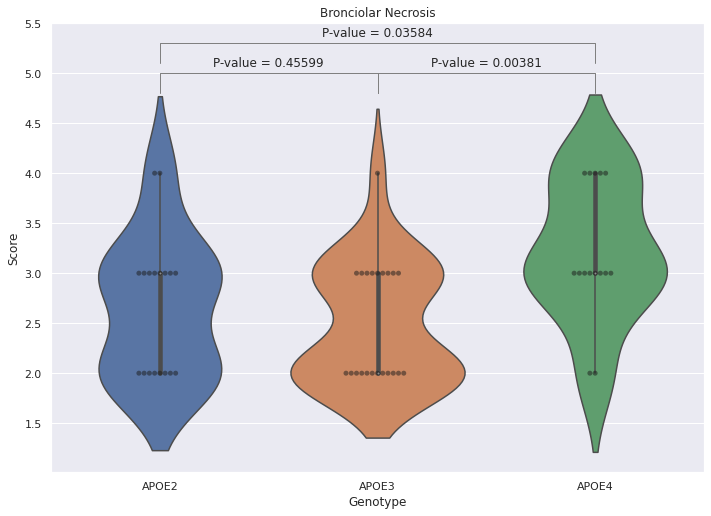

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

stat,pval_23 = stats.mannwhitneyu(df_hist[df_hist.genotype=="APOE2"].bronchiolar_necrosis,df_hist[df_hist.genotype=="APOE3"].bronchiolar_necrosis,alternative="two-sided")

stat,pval_43 = stats.mannwhitneyu(df_hist[df_hist.genotype=="APOE4"].bronchiolar_necrosis,df_hist[df_hist.genotype=="APOE3"].bronchiolar_necrosis,alternative="two-sided")

stat,pval_24 = stats.mannwhitneyu(df_hist[df_hist.genotype=="APOE2"].bronchiolar_necrosis,df_hist[df_hist.genotype=="APOE4"].bronchiolar_necrosis,alternative="two-sided")

ax = sns.violinplot(x="genotype", y="bronchiolar_necrosis", data=df_hist, fliersize=0)
ax = sns.swarmplot(x="genotype", y="bronchiolar_necrosis", data=df_hist, color="k",alpha=0.5, ax=ax)
ax.set(title= "Bronciolar Necrosis",xlabel="Genotype",ylabel="Score")

ax.plot([0,0,1,1],[4.8,5,5,4.8], lw=1,color="grey")
ax.text(0.5,5.1, "P-value = {}".format(np.round(pval_23, 5)), ha="center", va="center")

ax.plot([1,1,2,2],[4.8,5,5,4.8], lw=1,color="grey")
ax.text(1.5,5.1, "P-value = {}".format(np.round(pval_43, 5)), ha="center", va="center")

ax.plot([0,0,2,2],[5.1,5.3,5.3,5.1], lw=1,color="grey")
ax.text(1, 5.4, "P-value = {}".format(np.round(pval_24, 5)), ha="center", va="center")
plt.savefig(DATA/ "Bronchiolar.png")